# **CAPSTONE PROJECT MODULE 2 : EDA AWS SAAS SALES**

## **CONTEXT DATA**
---

### **A. Latar Belakang**

Amazon Web Services (AWS) adalah sebuah penyedia layanan cloud computing yang didirikan oleh Amazon.com pada tahun 2006. AWS menyediakan berbagai layanan komputasi, salah satunya adalah SaaS yaitu "Software as a Service". Saas merupakan salah satu model layanan cloud computing di mana perangkat lunak atau aplikasi disediakan kepada pengguna melalui internet sebagai layanan berlangganan.

Segmentasi penjualan AWS SaaS dibagi menjadi 3 berdasarkan karakteristik tertentu, seperti profil pelanggan, preferensi pembelian, atau performa transaksi. Hal ini dapat membantu dalam pemahaman lebih mendalam tentang perilaku pelanggan, meningkatkan strategi pemasaran, dan mengoptimalkan hasil penjualan. Segmentasi penjualan AWS ialah: 

| Jenis Segmen | Deskripsi |
|--------------|-----------|
| SMB | Small and Medium-sized Businesses, yang dalam bahasa Indonesia dikenal sebagai "Usaha Kecil dan Menengah" (UKM) |
| Strategic | Segmen yang tidak hanya didasarkan pada karakteristik umum seperti ukuran bisnis (SMB, perusahaan besar) atau geografi, tetapi juga mencerminkan strategi bisnis yang lebih dalam |
| Entreprise | Dalam konteks bisnis dan teknologi merujuk pada segmen pasar yang terdiri dari perusahaan-perusahaan besar atau korporasi |

Berdasarkan segmentasi penjualan AWS SaaS, maka dapat dilakukan analisis untuk mengetahui tren penjualan dan keuntungan dari industri AWS di tiap-tiap wilayah  untuk mencapai Goals yang dibutuhkan **Tim Divisi Sales & Marketing AWS** selaku **stakeholder**.


### **B. Goals and Problem**

**Problems** :
1. Bagaimana kinerja penjualan AWS secara keseluruhan berdasarkan tren penjualan produk AWS?
2. Bagaimana keuntungan yang dihasilkan dari produk AWS?
3. Produk AWS mana yang paling menguntungkan, dan apa faktor-faktor yang memengaruhi tingkat keuntungan produk-produk tersebut?
4. Bagaimana manajemen AWS dapat menggunakan data pelanggan (kolom "Customer") untuk memperbaiki layanan pelanggan dan memastikan kepuasan pelanggan?
5. Bagaimana lokasi geografis memengaruhi pola penjualan AWS? Apakah ada pasar yang lebih potensial?
6. Apakah ada strategi yang dapat digunakan untuk meningkatkan keuntungan dari penjualan produk AWS? Bagaimana efisiensi operasional dapat ditingkatkan untuk mencapai margin keuntungan yang lebih baik?

**Goals** :
1. **Mengukur Kinerja Penjualan**: Melakukan analisis kinerja penjualan termasuk total penjualan (kolom "Sales") dari waktu ke waktu. Ini akan membantu mereka memahami apakah mereka mencapai target penjualan mereka.

2. **Menganalisis Keuntungan** : Mengidentifikasi keuntungan (kolom "Profit") yang dihasilkan dari penjualan produk AWS.

3. **Memahami Tren Penjualan**: Menganalisis data transaksi berdasarkan tanggal order dan wilayah pemesanan dilakukan. Hal ini membantu stakeholder dalam mengidentifikasi musim penjualan, wilayah yang tumbuh pesat, dan wilayah yang memerlukan perhatian lebih.

4. **Manajemen Hubungan Pelanggan**: Manajemen dapat menggunakan data pelanggan (kolom "Customer") untuk memahami interaksi dengan pelanggan dan memastikan bahwa pelanggan mendapatkan layanan yang baik. Melalui analisis ini, Mereka dapat melihat riwayat pesanan pelanggan dan memberikan penawaran khusus kepada pelanggan setia.

5. **Mengidentifikasi Kegagalan dalam Penjualan**: Data ini juga dapat digunakan untuk mengidentifikasi transaksi atau produk yang tidak berhasil. Ini membantu dalam mengambil tindakan perbaikan untuk mengurangi kerugian dan meningkatkan efisiensi penjualan.

### **C. Import Data**

Sebelum melakukan data analysis, hal pertama yang harus dilakukan ialah melakukan import library sesuai dengan kebutuhan data. Lalu load data yang akan dianalisis.

In [1]:
#Import Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind, kstest

import warnings
warnings.filterwarnings("ignore")

Menampilkan dataset yang digunakan, yaitu : AWS SaaS Sales

In [2]:
#Load Dataset

data = pd.read_csv('Saas-Sales.csv')
data

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200


In [3]:
#Menampilkan 5 Baris Teratas dari Dataset
data.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


## **DATA UNDERSTANDING**
---

### **Aspek-Aspek Dalam Data**

Dataset merupakan data yang berisi informasi terkait sales dan profit yang dihasilkan AWS pada layanan komputasi SaaS yaitu "Software as a Service". Terdapat 19 kolom dalam dataset mentah yang nantinya akan difilter sesuai dengan kebutuhan analisis AWS Saas Sales. Berikut list kolom yang ada didalam dataset AWS Saas Sales, yaitu:

|Nama Kolom| Keterangan|
|----------|------------|
|Row ID | ID unik setiap pesanan|
|Order ID | ID unik setiap pesanan|
|Order Date | Tanggal ketika pesanan dilakukan|
|Date Key | Representasi numerik dari tanggal pesanan (YYYYMMDD)|
|Contact Name | Nama orang yang melakukan pemesanan|
|Country | Negara tempat pemesanan dilakukan|
|City | Kota tempat pemesanan dilakukan|
|Region | Wilayah tempat pesanan dilakukan|
|Subregion | Subwilayah tempat pesanan dilakukan|
|Customer | Nama perusahan yang melakukan pemesanan|
|Customer ID | ID unik untuk setiap pelanggan|
|Industry | Industri tempat pelanggan berada|
|Segment | Segmen pelanggan|
|Product | Produk yang dipesan|
|Licence | ID lisensi unik untuk produk|
|Sales | Jumlah total penjualan untuk transaksi|
|Quantity | Jumlah total item dalam transaksi|
|Discount | Diskon yang diterapkan pada transaksi|
|Profit | Keuntungan dari transaksi|

Terdapat beberapa kolom yang nantinya akan dihapus karena dianggap tidak relevan dnegan analisis, yaitu:

|Nama Kolom| Keterangan|
|----------|------------|
| Date Key | Kolom berisi data yang sudah terdapat dalam kolom "Order date |
| Licence | Kolom hanya berisi kode lisensi produk yang tidak diperlukan untuk analisis data |
| Region | Analisis data yang menyangkut wilayah akan menggunakan kolom "Country" dan "City" |
| Subregion | Sama seperti pada kolom "Region", analisis data yang menyangkut wilayah akan menggunakan kolom "Country" dan "City" |

Selain itu juga terdapat penambahan kolom baru yang relevan kedalam dataset untuk kebutuhan analisis, yaitu:

|Nama Kolom| Keterangan|
|----------|------------|
| Order Month | Tanggal pemesanan dilakukan dalam skala bulan |
| Order Year | Tanggal pemesanan dilakukan  dalam skala bulan dan tahun |

## **DATA CLEANING**
---

**Tujuan** : Mencari anomali data dan menanggulangi anomali tersebut.

Langkah-langkah yanng dilakukan dalam *data cleaning* adalah:
1. Melihat informasi dataset termasuk tipe data, unique value, dan jumlah unique value dari setiap kolom.
2. Mengubah tipe data dari tiap kolom yang sekiranya belum sesuai.
3. Mengecek adanya *missing value* serta menanggulangi *missing value yang terdapat dalam kolom data.
4. Melihat adanya *duplicate values* dan melakukan analisis.
5. Menganalisis outliers yang terdapat dalam dataset.

#### **Informasi Dataset**

In [4]:
#Menampilkan detail informasi dari setiap kolom, yaitu:
# 1. Nama kolom
# 2. Tipe data
# 3. Jumlah Missing Value
# 4. Persentase jumlah Missing Value
# 5. Jumlah unique value
# 6. Sampel unique value 

list_data = []
for i in data.columns :
    list_data.append([
        i, #nama kolom
        data[i].dtype, #tipe data dari setiap kolom
        data[i].isna().sum(), #jumlah missing value
        round((data[i].isna().sum()/len(data)*100),2), #persentase missing value
        data[i].nunique(), #jumlah unique value
        list(data[i].drop_duplicates().sample(2).values) #sampel unique value
    ])

pd.DataFrame(list_data, columns = ['Kolom', 'Tipe Data', 'null', 'nullPct', 'Unique', 'Sampel Unique'])

,Kolom,Tipe Data,null,nullPct,Unique,Sampel Unique
0,Row ID,int64,0,0.0,9994,"[7229, 3073]"
1,Order ID,object,0,0.0,5009,"[EMEA-2023-118535, AMER-2022-105291]"
2,Order Date,object,0,0.0,1237,"[12/19/2023, 11/7/2023]"
3,Date Key,int64,0,0.0,1237,"[20200722, 20230708]"
4,Contact Name,object,0,0.0,793,"[Dominic Hill, Joshua Vaughan]"
5,Country,object,0,0.0,48,"[Taiwan, Ukraine]"
6,City,object,0,0.0,262,"[Salvador, Brno]"
7,Region,object,0,0.0,3,"[AMER, APJ]"
8,Subregion,object,0,0.0,12,"[MEA, IND]"
9,Customer,object,0,0.0,99,"[Humana, Royal Dutch Shell]"


Berdasarkan informasi dataset, tidak terdapat missing value dalam data.

Selanjutnya, kita melihat data statistik yang bersifat numerik. Dari tahap ini, kita dapat melihat data statistik dari Sales, Profit, Discount seperti count,mean, min, max, std, dll.

In [5]:
data.describe()

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


### **Cross-Check Missing Value**

Langkah ini dilakukan untuk memastikan tidak adanya missing value dalam dataset dengan mengecek jumlah data antara profit yang 0 dengan discount 0. Hal ini dilakukan karena tidak mungkin produk dengan discount 0 tidak menghasilkan profit sama sekali alias 0.

In [6]:
data[(data['Profit']== 0) & (data['Discount']== 0)].count()
                

Row ID          30
Order ID        30
Order Date      30
Date Key        30
Contact Name    30
Country         30
City            30
Region          30
Subregion       30
Customer        30
Customer ID     30
Industry        30
Segment         30
Product         30
License         30
Sales           30
Quantity        30
Discount        30
Profit          30
dtype: int64

Setelah dilakukan pengecekan, ditemukan adanya 30 baris data yang memiliki nilai profit dan discount sebesar 0. Dalam konteks analisis data yang akan dilakukan, data-data ini dianggap tidak berpengaruh signifikan terhadap hasil akhir karena jumlahnya yang sangat sedikit. Oleh karena itu, langkah yang paling efisien adalah dengan menghapus data tersebut.

In [7]:
#Menghapus baris data yang berisi profit = 0 dan discount = 0

data.drop(data[(data['Profit']== 0) & (data['Discount']== 0)].index,axis = 0, inplace = True)

#### **Duplikasi Data**

Dilakukan check duplikasi data untuk memastikan tidak ada data yang terduplikat. 

In [8]:
#Mengecek data yang terduplikasi

data[data.duplicated()]

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit


In [9]:
#Mengecek data yang terduplikasi bila mengesampingkan kolom Order ID dan Row ID

data[data.duplicated(subset=data.columns.difference(['Order ID','Row ID']), keep=False)]

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit


Hasil ditemukan tidak ada data yang terduplikasi.

### **Menghapus Kolom yang Tidak Diperlukan**

Dari informasi dataset diatas, perlu dilakukan penghapusan kolom karena kolom tidak relevan dalam analisis data. Beberapa kolom yang dihapus daari dataset adalah:
1. **"Date Key"**, karena kolom berisi data yang sudah terdapat dalam kolom "Order date".
2. **"Licence"**, karena kolom hanya berisi kode lisensi produk yang tidak diperlukan untuk analisis data.
3. **"Region"**, karena analisis data yang menyangkut wilayah akan menggunakan kolom "Country" dan "City".
4. **"Subregion"**, karena analisis data yang menyangkut wilayah akan menggunakan kolom "Country" dan "City".

Dengan menghapus kolom-kolom ini, Dataset akan menjadi lebih ringkas dan terfokus pada data yang benar-benar penting untuk analisis.

In [10]:
#Menghapus kolom yang tidak diperlukan

data.drop(['Date Key','License','Region', 'Subregion'], axis =1, inplace = True) #Hapus kolom

### **Mengubah Tipe Data**

Mengubah tipe data kolom "Order Date" dari object menjadi datetime. 

In [11]:
#Mengubah tipe data kolom Order Date

data['Order Date'] = pd.to_datetime(data['Order Date'])

In [12]:
#Melihat apakah tipe data sudah berubah atau belum
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9964 entries, 0 to 9993
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9964 non-null   int64         
 1   Order ID      9964 non-null   object        
 2   Order Date    9964 non-null   datetime64[ns]
 3   Contact Name  9964 non-null   object        
 4   Country       9964 non-null   object        
 5   City          9964 non-null   object        
 6   Customer      9964 non-null   object        
 7   Customer ID   9964 non-null   int64         
 8   Industry      9964 non-null   object        
 9   Segment       9964 non-null   object        
 10  Product       9964 non-null   object        
 11  Sales         9964 non-null   float64       
 12  Quantity      9964 non-null   int64         
 13  Discount      9964 non-null   float64       
 14  Profit        9964 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(3),

Tipe data kolom 'Order Date" sudah berubah menjadi datetime.

### **Menambah Kolom Baru yang Dibutuhkan untuk Analisis Data**

Menambahkan kolom baru yang berisi bulan dan tahun yang berasal dari kolom "Order Date" untuk melihat tren penjualan dalam skala bulan dan tahun.

In [13]:
#Menambah kolom Order Month dan Order Year

data['Order Month'] = data['Order Date'].dt.month #Bulan
data['Order Year'] = data['Order Date'].dt.year #Tahun

In [14]:
#Menampilkan 5 baris teratas dari dataset untuk melihat kolom yang sudah ditambahkan
data.head()

,Row ID,Order ID,Order Date,Contact Name,Country,City,Customer,Customer ID,Industry,Segment,Product,Sales,Quantity,Discount,Profit,Order Month,Order Year
0,1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,Chevron,1017,Energy,SMB,Marketing Suite,261.9600,2,0.00,41.9136,11,2022
1,2,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,Chevron,1017,Energy,SMB,FinanceHub,731.9400,3,0.00,219.5820,11,2022
2,3,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,Phillips 66,1056,Energy,Strategic,FinanceHub,14.6200,2,0.00,6.8714,6,2022
3,4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,957.5775,5,0.45,-383.0310,10,2021
4,5,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,22.3680,2,0.20,2.5164,10,2021


### **Menganalisis Outliers**

#### *Outliers pada Kolom yang Numerik*

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9964 entries, 0 to 9993
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9964 non-null   int64         
 1   Order ID      9964 non-null   object        
 2   Order Date    9964 non-null   datetime64[ns]
 3   Contact Name  9964 non-null   object        
 4   Country       9964 non-null   object        
 5   City          9964 non-null   object        
 6   Customer      9964 non-null   object        
 7   Customer ID   9964 non-null   int64         
 8   Industry      9964 non-null   object        
 9   Segment       9964 non-null   object        
 10  Product       9964 non-null   object        
 11  Sales         9964 non-null   float64       
 12  Quantity      9964 non-null   int64         
 13  Discount      9964 non-null   float64       
 14  Profit        9964 non-null   float64       
 15  Order Month   9964 non-null   int32        

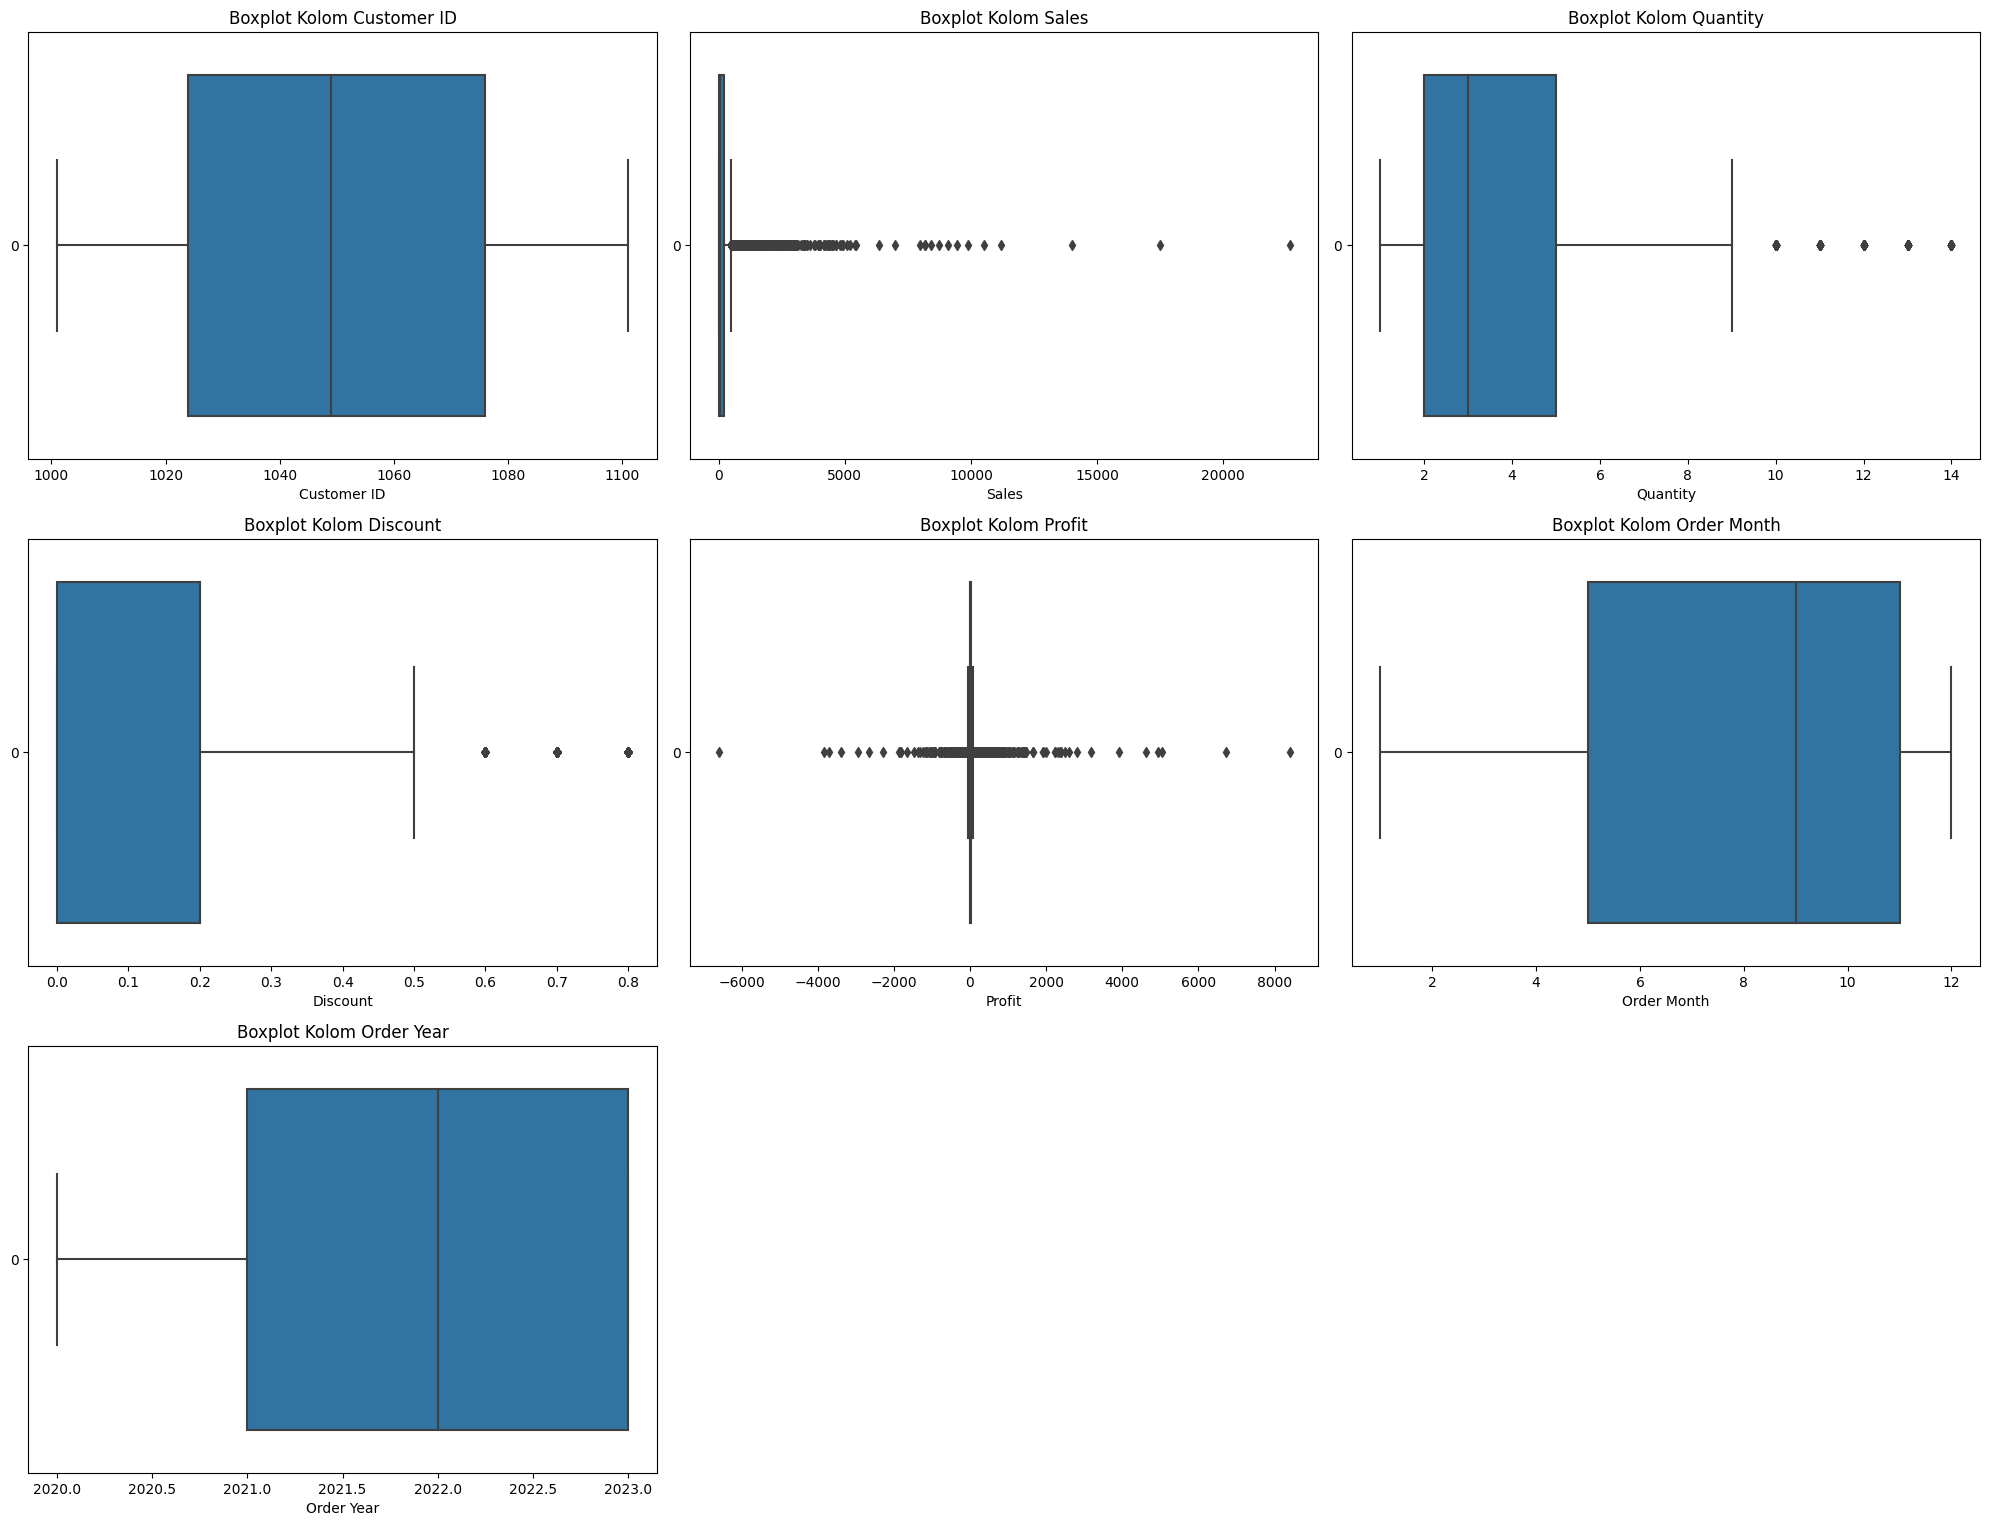

In [16]:
# Membuat variabel baru berisi kolom-kolom numerik
outliers_numerik = data[[
    'Customer ID',
    'Sales',
    'Quantity',
    'Discount',
    'Profit',
    'Order Month',
    'Order Year'
]]

# Menampilkan Outliers dengan Boxplot
plt.figure(figsize=(20,20))
for x, kolom in enumerate(outliers_numerik, 1):
    plt.subplot(4, 3, x)  # Menggunakan x sebagai indeks subplot
    sns.boxplot(data=data[kolom], orient='horizontal') #visualisasi outliers dengan boxplot
    plt.title(f'Boxplot Kolom {kolom}') #judul boxplot
    plt.xlabel(kolom)

plt.tight_layout()
plt.show()


In [17]:
def outliers(data,column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    Quartil_bawah = Q1 - 1.5 * IQR
    Quartil_atas = Q3 - 1.5 * IQR
    outliers = data[(data[column]<Quartil_bawah) | (data[column]<Quartil_atas)]
    return outliers

for column in outliers_numerik:
    data_outliers = (len(outliers(data,column)))
    print(f'Total ouliers pada kolom "{column}" adalah {data_outliers}')
    print(f'Persentase outliers pada kolom "{column}" adalah {(round(data_outliers/(len(data[column]))*100,2))}%\n')

Total ouliers pada kolom "Customer ID" adalah 0
Persentase outliers pada kolom "Customer ID" adalah 0.0%

Total ouliers pada kolom "Sales" adalah 0
Persentase outliers pada kolom "Sales" adalah 0.0%

Total ouliers pada kolom "Quantity" adalah 0
Persentase outliers pada kolom "Quantity" adalah 0.0%

Total ouliers pada kolom "Discount" adalah 0
Persentase outliers pada kolom "Discount" adalah 0.0%

Total ouliers pada kolom "Profit" adalah 1146
Persentase outliers pada kolom "Profit" adalah 11.5%

Total ouliers pada kolom "Order Month" adalah 383
Persentase outliers pada kolom "Order Month" adalah 3.84%

Total ouliers pada kolom "Order Year" adalah 0
Persentase outliers pada kolom "Order Year" adalah 0.0%



**Beberapa statement yang diperoleh dari analisis outliers:**
1. Kolom "Profit" memilki outliers sebanyak 1146  data. Hal ini menunjukan bahwa adanya profit yang nilainya sangat tinggi maupun yang minus.
2. Kolom "Order Month" memiliki outliers sebanyak 383 data. Hal ini diakibatkan adanya ketimpangan pada waktu orderan.
3. Kolom "Customer ID", "Sales", "Quantity", "Discount", "Order Year" tidak terdapat outliers.
4. Secara keseluruhan, outliers yang ada tidak menjadi permasalahan dalam analisis data yang akan dilakukan. Seperti halnya pada kolom Profit, nilai yang sangat tinggi dan minus dapat dijadikan bahan untuk analisis seberapa tinggi dan rendah profit yang dihasilkan AWS serta penanggulangannya. 
5. Dari analisis outliers, diketahui dsitribusi data tidak normal, sehingga digunakan media sebagai rata-rata untuk data analisis.

### **Hasil yang Diperoleh Dari Data Cleaning**

1. Kolom Order Date memiliki tipe data object sehingga perlu diubah menjadi datetime.
2. Tidak terdapat missing value dalam dataset. 
3. Tidak terdapat duplikasi data dalam dataset.
4. Kolom yang dihapus dari dataset karena tidak relevan dengan data analisis yaitu:
    - Date Key
    - Licence
    - Region
    - Subregion
5. Kolom baru yang ditambahkan dalam dataset untuk keperluan data analisis adalah:
    - Order Month
    - Order Year
6. Terdapat outliers dalam dataset, namun outliers tidak dihapus karena tetap diperlukan dalam analisis data.

Setelah dataset telah clean dari anomali, lalu dataset disimpan

In [18]:
#Menyimpan dataset yang sudah bersih
data.to_csv('clean data AWS_SaaS.csv')

## **DATA ANALYSIS**
---

Analisis data yang akan dilakukan pada dataset AWS SaaS Sales bertujuan untuk mencapai goals berdasarkan dari masalah-masalah yang ada. Berikut adalah analisis data yang akan dilakukan, yaitu:
1. Total order yang diperoleh AWS setiap tahun
2. Kinerja penjualan AWS
3. Profit yang dihasilkan AWS
4. Manajemen hubungan pelanggan/customer dengan AWS
4. Manajemen Hubungan Pelanggan
5. Pengaruh Lokasi Geografis Terhadap Penjualan AWS

Namun sebelum itu, perlu dilihat distribusi data dari setiap kolom numerik untuk melihat apakah data terdistribusi normal atau tidak normal. Apabila diketahui distribusi tidak normal atau skewed, maka digunakan median sebagai nilai tengah, dan apabila terdistribusi normal maka mean digunakan sebagai nilai tengah.

### **Analisis Distribusi Data**

In [19]:
# Menampilkan distribusi data dengan test normalitas 

#import fungsi dari library untuk uji normalitas
from scipy.stats import kstest

#Nama kolom yang akan diuji normalitas
kolomNormalitas = data[['Customer ID','Sales','Quantity','Discount','Profit','Order Month','Order Year']]

#membuat list kosong untuk menaruh hasil uji distribusi dari setiap kolom
list = []

#Looping uji normalitas dari setiap kolom yang berada pada list kolomNormalitas
for i in kolomNormalitas : 
    ks,pvalue = kstest((data[i]), 'norm')
    if pvalue> 0.05:
        list.append([i,round(pvalue,3), 'distribusi normal'])
    else :
        list.append([i,round(pvalue,3), 'distribusi tidak normal'])

print('Jika p-value > 0,05 maka distribusi data normal')
print('Jika p-value > 0,05 maka distribusi data tidak normal')
print('\n')
print('Hasil Uji Normalitas')
pd.DataFrame(list, columns =[['Nama kolom','P-value','Distribusi Data']])

Jika p-value > 0,05 maka distribusi data normal
Jika p-value > 0,05 maka distribusi data tidak normal


Hasil Uji Normalitas


,Nama kolom,P-value,Distribusi Data
0,Customer ID,0.0,distribusi tidak normal
1,Sales,0.0,distribusi tidak normal
2,Quantity,0.0,distribusi tidak normal
3,Discount,0.0,distribusi tidak normal
4,Profit,0.0,distribusi tidak normal
5,Order Month,0.0,distribusi tidak normal
6,Order Year,0.0,distribusi tidak normal


Berdasarkan uji normalitas pada kolom 'Customer ID', 'Sales', 'Quantity', 'Discount', 'Profit', 'Order Month', 'Order Year' diperoleh **distribusi data tidak normal**. Maka untuk mencari nilai tengah dalam analisis data menggunakan **median**.

### **1. Total Order yang Diperoleh AWS Setiap Tahun**

Analisis pertama yang dilakukan ialah mencari total order yang dihasilkan AWS SaaS dalam skala per-tahun dan per-bulan dari setiap tahunnya. Dengan mengetahui total order, maka kita akan tahu apakah produk yang ditawarkan AWS diminati masyarakat atau tidak.

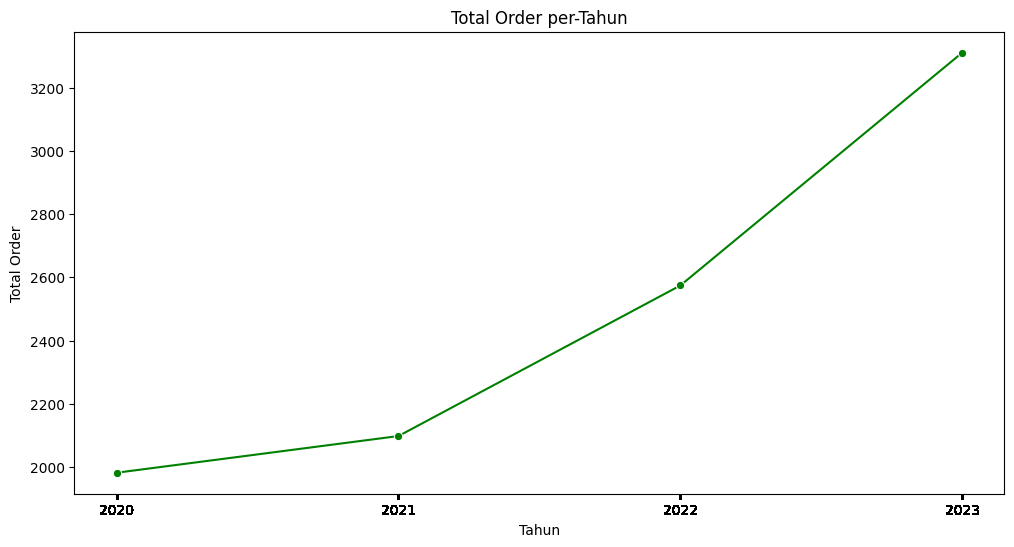

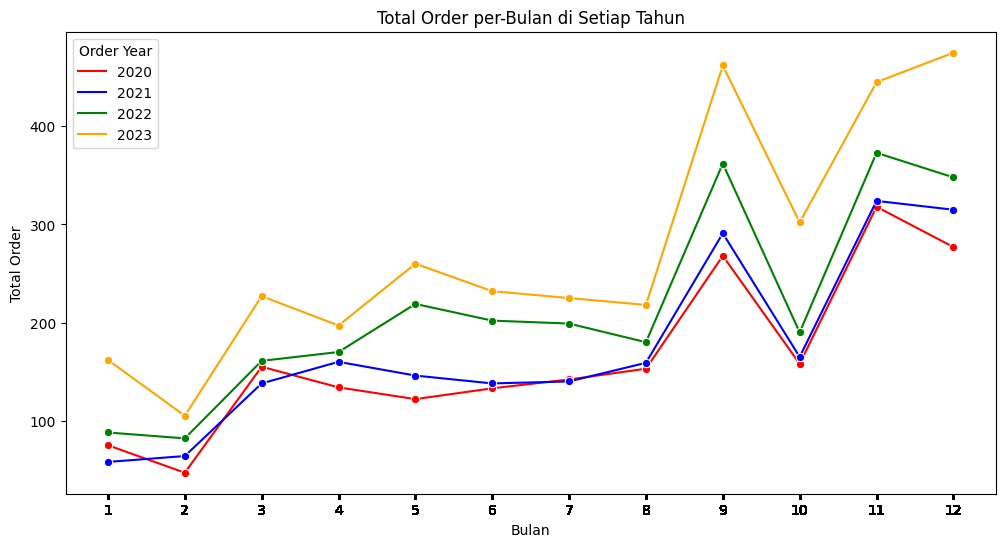

In [20]:
#Mengelompokkan data berdasarkan bulan dan tahun, dan menghitung total Order
orderMonthlyTrend = data.groupby(['Order Month','Order Year'])['Order ID'].count().reset_index()

#Mengelompokkan data berdasarkan tahun, dan menghitung total Order
orderYearlyTrend = data.groupby(['Order Year'])['Order ID'].count().reset_index()

# Visualisasi data Order per Tahun
plt.figure(figsize=(12,6))
sns.lineplot(x='Order Year', y = 'Order ID', data = orderYearlyTrend, color = 'green' , marker = 'o')
plt.title('Total Order per-Tahun')
plt.ylabel('Total Order')
plt.xlabel('Tahun')
plt.xticks(data['Order Year'])

# Visualisasi data Order per bulan dan tahun
custom_colors = ["red", "blue", "green", "orange"] #warna line chart
plt.figure(figsize=(12,6)) #ukuran chart
sns.lineplot(x='Order Month', y = 'Order ID', hue = 'Order Year', data = orderMonthlyTrend, palette = custom_colors, marker = 'o')
plt.title('Total Order per-Bulan di Setiap Tahun')
plt.ylabel('Total Order')
plt.xlabel('Bulan')
plt.xticks(data['Order Month'])

# Menampilkan grafik
plt.show()

Terlihat bahwa permintaan order dari tahun ke tahun terus meningkat. Hal ini menunjukkan semakin tinggi antusiasme customer setiap tahunnya, walaupun bila diperinci dengan analisa per-bulan terdapat penurunan secara konsisten di bulan Oktober, namun secara keseluruhan jumlah order tetap mengalami peningkatan.

### **2. Kinerja Penjualan AWS**

#### *a. Tren Sales dari Tahun ke Tahun*

Dengan mengetahui jumlah order yang dihasilkan oleh AWS, kita dapat menganalisis tren penjualan per-tahun dan per-bulan untuk melihat apakah penjualan berbanding lurus dengan jumlah order tersebut

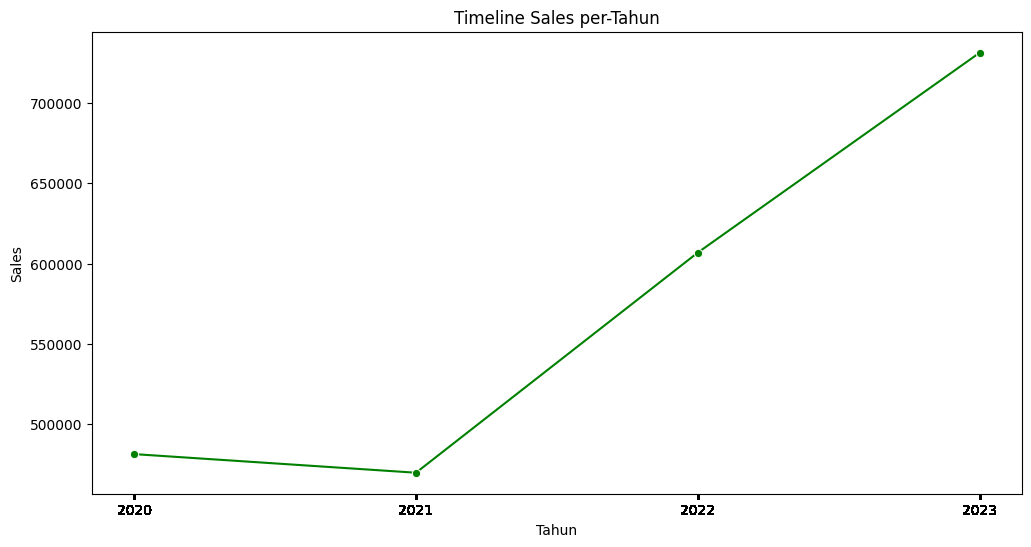

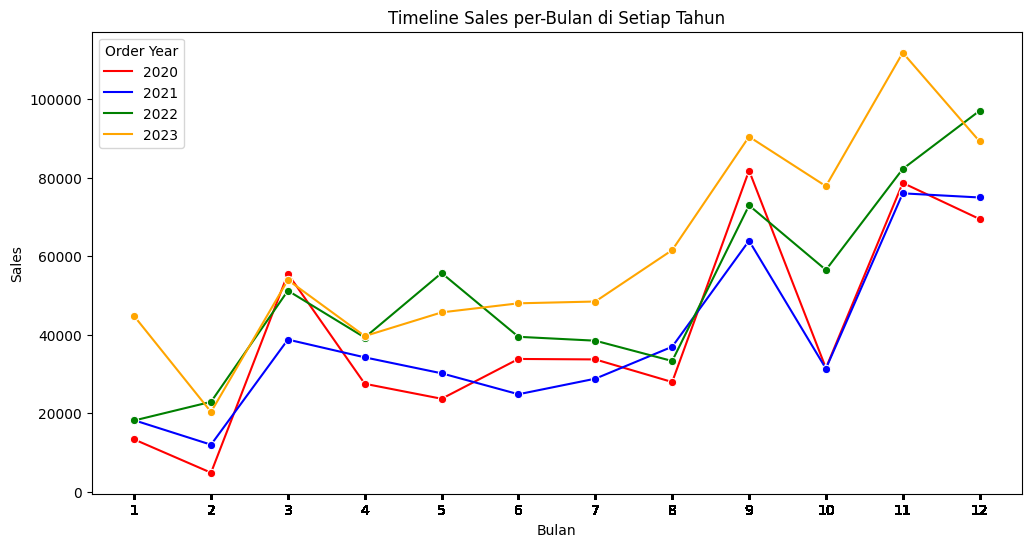

In [21]:
#Mengelompokkan data berdasarkan bulan dan tahun, dan menghitung total Sales
salesMonthlyTrend = data.groupby(['Order Month','Order Year'])['Sales'].sum().reset_index()

#Mengelompokkan data berdasarkan tahun, dan menghitung total Sales
salesYearlyTrend = data.groupby(['Order Year'])['Sales'].sum().reset_index()

# Visualisasi data Sales per Tahun
plt.figure(figsize=(12,6))
sns.lineplot(x='Order Year', y = 'Sales', data = salesYearlyTrend, color = 'green' , marker = 'o')
plt.title('Timeline Sales per-Tahun')
plt.ylabel('Sales')
plt.xlabel('Tahun')
plt.xticks(data['Order Year'])

# Visualisasi data Sales per bulan dan tahun
custom_colors = ["red", "blue", "green", "orange"] #warna line chart
plt.figure(figsize=(12,6)) #ukuran chart
sns.lineplot(x='Order Month', y = 'Sales', hue = 'Order Year', data = salesMonthlyTrend, palette = custom_colors, marker = 'o')
plt.title('Timeline Sales per-Bulan di Setiap Tahun')
plt.ylabel('Sales')
plt.xlabel('Bulan')
plt.xticks(data['Order Month'])

# Menampilkan grafik
plt.show()


Grafik tren penjualan per tahun menunjukkan penurunan pada tahun 2021 yang kemudian diikuti oleh peningkatan di tahun 2022 dan 2023. Hal ini diyakini terkait dengan dampak pandemi Covid-19 yang merosotkan ekonomi pada tahun tersebut. Sementara itu, analisis data penjualan bulanan mengungkapkan kenaikan yang konsisten pada bulan Maret, September, dan November setiap tahunnya, sementara penurunan terjadi pada bulan Februari.

Grafik ini juga menggambarkan hubungan yang sebanding antara jumlah order dan penjualan. Artinya, ketika jumlah order meningkat, penjualan juga mengalami peningkatan yang sesuai.

#### *b. Segmen yang Paling Laku Terjual*

In [37]:
data[['Segment', 'Sales']].groupby(['Segment']).sum().sort_values(by = 'Sales',ascending = False)

,Sales
Segment,
SMB,1.157843e+06
Strategic,7.034496e+05
Enterprise,4.278368e+05


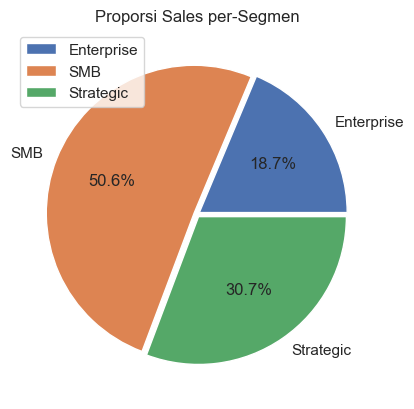

In [77]:
#Membuat variabel jumlah sales di setiap segmen
segmentSales = data.groupby('Segment')['Sales'].sum()

#Visualisasi data sales per-segmen
plt.pie(x = segmentSales, labels = segmentSales.index, autopct= '%1.1f%%', explode = (0.02,0.02,0.02))

# Menambahkan judul
plt.title('Proporsi Sales per-Segmen')
plt.legend()

# Menampilkan grafik
plt.show()


Terlihat bahwa segmen **SMB** menempati peringkat pertama dengan total penjualan paling tinggi yaitu sebesar 50,6% dari total penjualan AWS. Diikuti dengan segmen **Strategic**, lalu yang terakhir **Enterprise**.

#### *c. Total Sales di Setiap Segmen pada Industry*

Setelah melihat proporsi sales dari setiap segmennya, kita akan melihat segmen yang paling diminati Industri, dilihat dari sales tertinggi. 

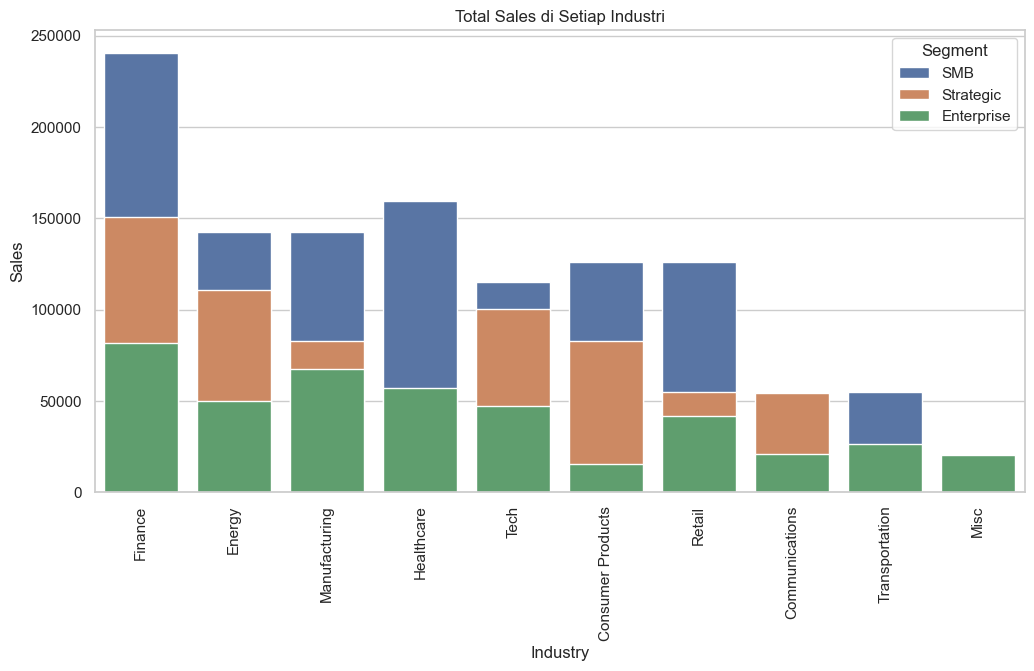

In [80]:
#Membuat variabel jumlah Sales di setiap Industry
industrySales = data.groupby('Industry')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)

#Visualisasi data Sales di setiap Industry
plt.figure(figsize=(12,6))
sns.set(style="whitegrid", font_scale=1)
sns.barplot(data=data,
            x='Industry', 
            y='Sales',
            estimator=np.sum, 
            hue='Segment',
            ci=0,
            order=industrySales['Industry'],dodge=False)

plt.title('Total Sales di Setiap Industri')
plt.xticks(rotation=90)

#Menampilkan grafik
plt.show()

Dari analisis grafik tersebut, kita dapat mengefektifkan teknik pemasaran dengan mempertimbangkan temuan-temuan berikut:

1. **Maksimalkan Segmen "SMB"**: Karena segmen "SMB" mendominasi penjualan di hampir semua industri, fokus pemasaran dapat ditingkatkan untuk segmen ini, kecuali di industri Communication dan Miscellaneous.

2. **Perluasan Segmen "Strategic"**: Perlu dipertimbangkan upaya untuk meningkatkan minat segmen "Strategic" dalam industri Healthcare, Transportation, dan Miscellaneous dengan strategi pemasaran yang lebih tepat sasaran.

3. **Peningkatan Penawaran "Enterprise" di Industri Miscellaneous**: Khusus untuk industri Miscellaneous, peningkatan penawaran dan strategi pemasaran untuk segmen "Enterprise" bisa menjadi langkah yang efektif.

4. **Manfaatkan Potensi di Industri Finance**: Karena industri Finance memiliki total penjualan tertinggi di berbagai segmen, perlu ditingkatkan lagi upaya pemasaran dan layanan khusus untuk mempertahankan keunggulan ini.

Dengan demikian, tim pemasaran dapat lebih fokus dan efektif dalam memenuhi kebutuhan dan preferensi dari masing-masing industri dan segmen pelanggan.


#### *d. Total Sales Produk dari Setiap Segmen*

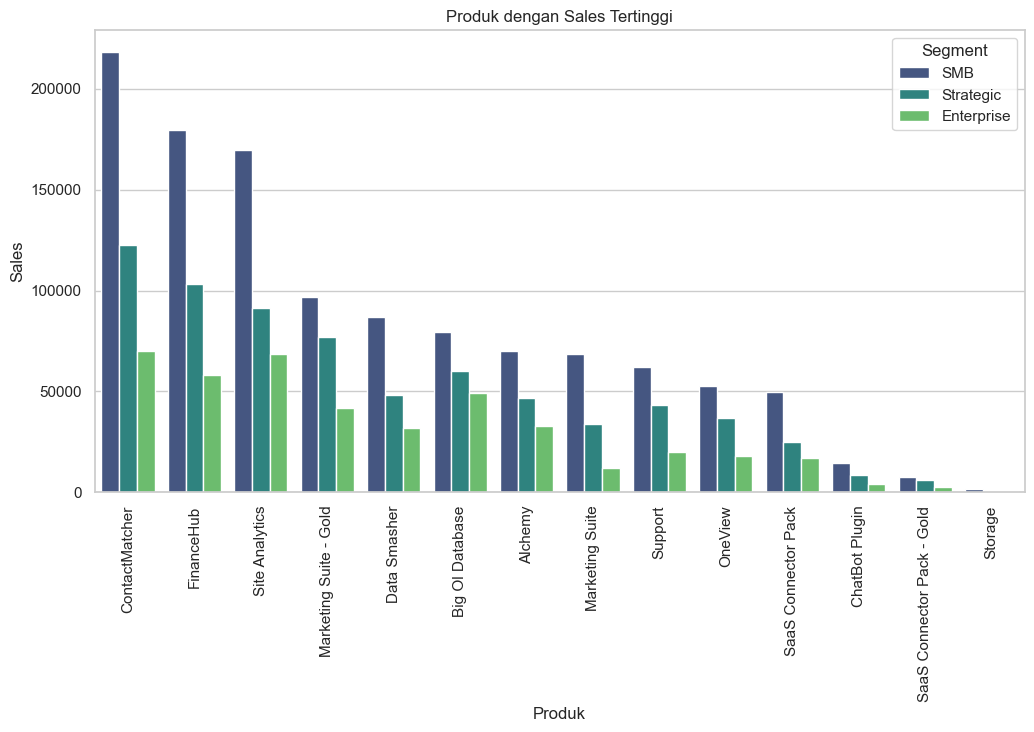

In [44]:
# Mengelompokkan data Product dalam Segment berdasarkan Sales
productSales = data.groupby(['Product', 'Segment'])['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)

# Visualisasi data Produk dalam Segment dengan Sales Tertinggi
plt.figure(figsize=(12, 6))
sns.barplot(x='Product', y='Sales', data=productSales, hue='Segment', palette='viridis')
plt.title('Produk dengan Sales Tertinggi')
plt.xlabel('Produk')
plt.ylabel('Sales')
plt.xticks(rotation=90)

plt.show()  # Menampilkan grafik


Produk "ContactMatcher" merupakan unggulan dengan penjualan tertinggi di ketiga segmen, diikuti oleh "FinanceHub" dan "Site Analytics." Sebaliknya, "Storage" menjadi produk dengan penjualan terendah. Perbedaan yang signifikan antara penjualan tertinggi dan terendah menunjukkan perlunya memberikan perhatian khusus pada produk-produk paling diminati dengan menjaga kualitas dan strategi pemasaran. Sementara itu, produk yang kurang laku memerlukan pertimbangan untuk re-branding atau bahkan pemutusan jika diperlukan, guna menghindari potensi kerugian di masa depan.

### **3. Profit yang Dihasilkan AWS**

Selanjutnya, identifikasi keuntungan yang dihasilkan dari penjualan produk AWS dapat dilihat pada grafik dibawah ini. 

#### *a. Tren Profit dari Tahun ke Tahun*

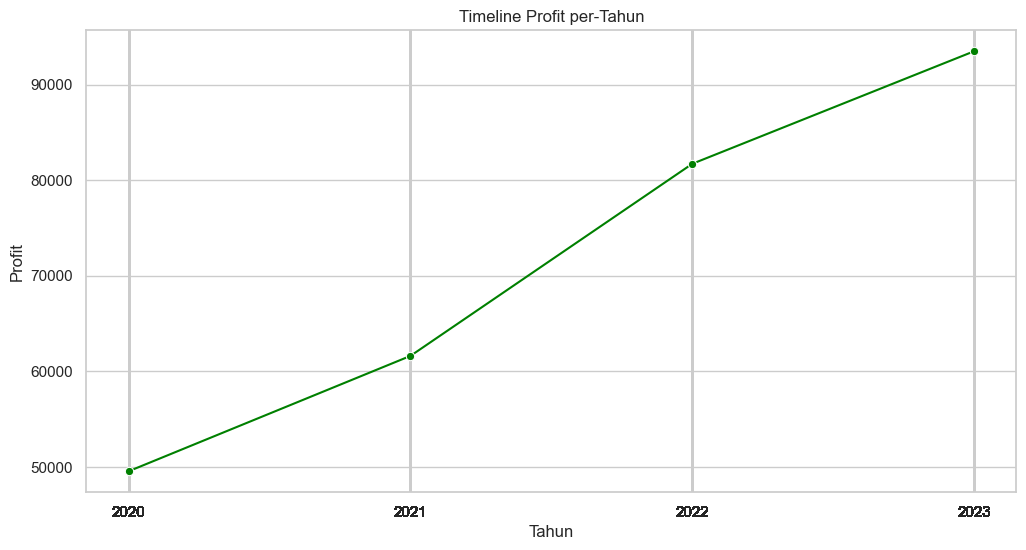

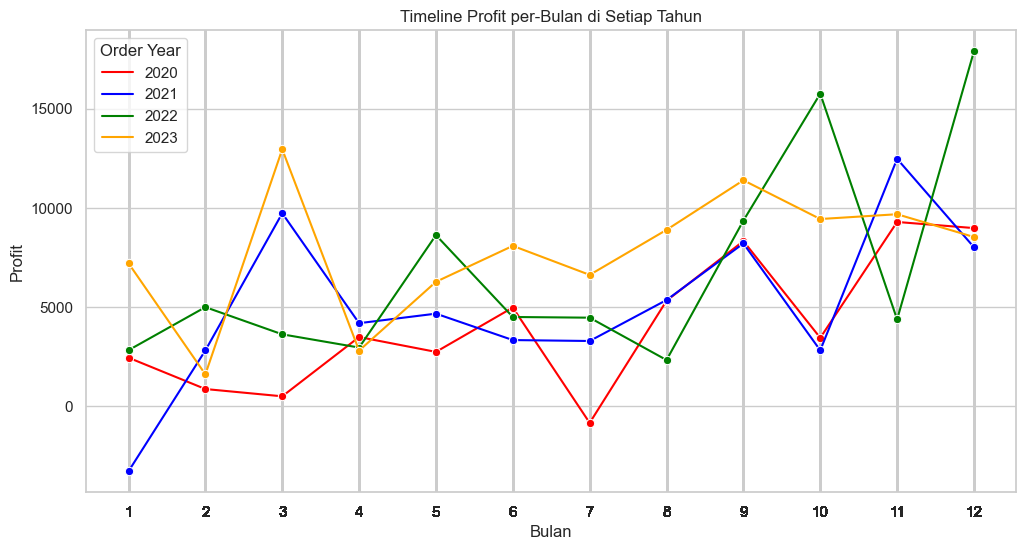

In [45]:
# Mengelompokkan data berdasarkan bulan dan tahun, dan menghitung total Profit
profitMonthlyTrend = data.groupby(['Order Month','Order Year'])['Profit'].sum().reset_index()

#Mengelompokkan data berdasarkan tahun, dan menghitung total Profit
profitYearlyTrend = data.groupby(['Order Year'])['Profit'].sum().reset_index()

# Visualisasi data Profit per Tahun
plt.figure(figsize=(12,6)) #ukuran chart
sns.lineplot(x='Order Year', y = 'Profit', data = profitYearlyTrend, color = 'green' , marker = 'o')
plt.title('Timeline Profit per-Tahun')
plt.ylabel('Profit')
plt.xlabel('Tahun')
plt.xticks(data['Order Year'])

# Visualisasi data Profit per bulan dan tahun
custom_colors = ["red", "blue", "green", "orange"] #warna line chart
plt.figure(figsize=(12,6)) #ukuran chart
sns.lineplot(x='Order Month', y = 'Profit', hue = 'Order Year', data = profitMonthlyTrend, palette = custom_colors, marker = 'o')
plt.title('Timeline Profit per-Bulan di Setiap Tahun')
plt.ylabel('Profit')
plt.xlabel('Bulan')
plt.xticks(data['Order Month'])

# Menampilkan grafik
plt.show()


Profit yang dihasilkan oleh AWS SaaS terus meningkat dari tahun ke tahun. Hal ini menunjukkan bahwa meskipun penjualan AWS mengalami fluktuasi, terutama pada beberapa periode waktu tertentu, namun hal tersebut tidak berdampak negatif pada profit yang dihasilkan. Ketika kita memeriksa pergerakan profit setiap bulannya, kita dapat melihat penurunan drastis pada bulan Oktober pada tahun 2020 dan 2021, serta penurunan yang serupa pada bulan Juli dan Oktober tahun 2020.

#### *b. Proporsi Segmen Berdasarkan Profit*

In [53]:
data[['Segment', 'Profit']].groupby(['Segment']).sum().sort_values(by = 'Profit',ascending = False).reset_index()

,Segment,Profit
0,SMB,134119.2092
1,Strategic,91979.1340
2,Enterprise,60298.6785


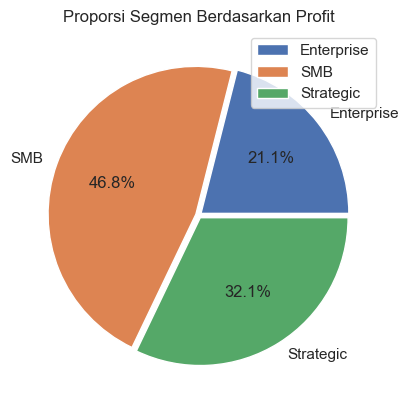

In [81]:
#Membuat variabel total profit di setiap segmen
segmentProfit = data.groupby('Segment')['Profit'].sum()

#Visualisasi data sales per-segmen
plt.pie(x = segmentProfit, labels = segmentProfit.index, autopct= '%1.1f%%', explode = (0.02,0.02,0.02))

# Menambahkan judul
plt.title('Proporsi Segmen Berdasarkan Profit')
plt.legend()

# Menampilkan grafik
plt.show()


Melalui grafik, meskipun terdapat perbedaan proporsi antara setiap segmen dalam hal profit dan sales, namun segmen "SMB" tetap menjadi penyumbang profit terbesar. Selanjutnya, diikuti oleh segmen "Strategic" dan terakhir adalah segmen "Enterprise."

#### *b. Produk dari Setiap Segmen yang Paling Menguntungkan*

Analisis produk yang paling menguntungkan dari setiap segment dapat dilakukan dengan melihat total profit yang dihasilkan. Produk yang memiliki total profit tertinggi adalah produk yang paling menguntungkan.

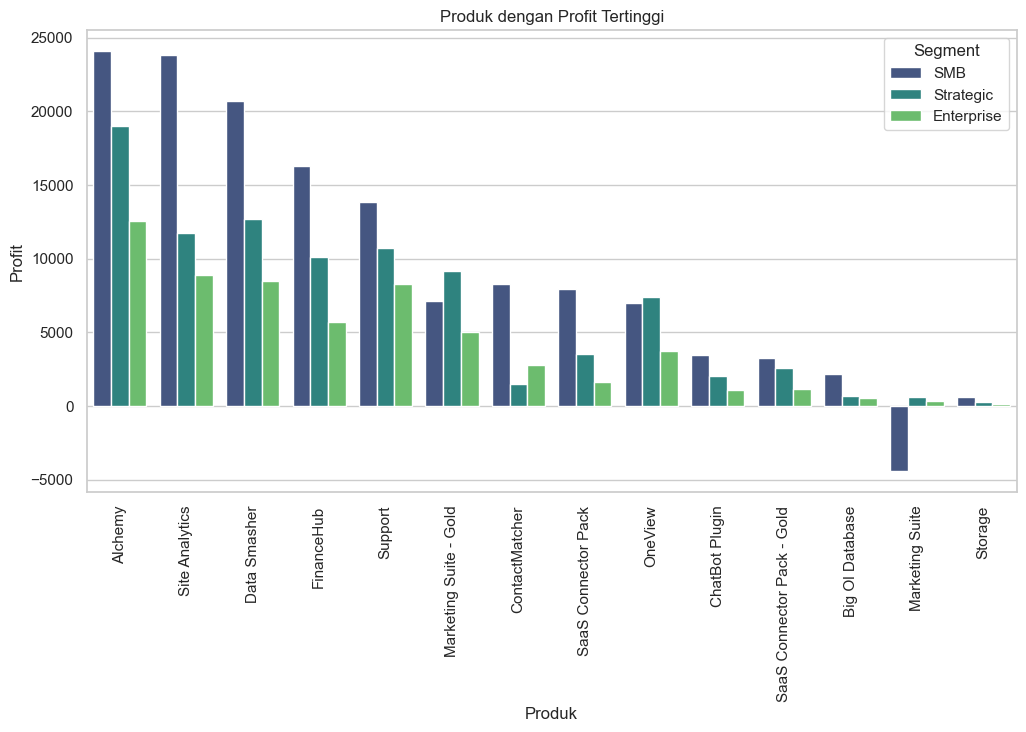

In [50]:
# Mengelompokkan data Product dalam Segment berdasarkan Sales
productProfit = data.groupby(['Product', 'Segment'])['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)

# Visualisasi data Produk dalam Segment dengan Sales Tertinggi
plt.figure(figsize=(12, 6))
sns.barplot(x='Product', y='Profit', data=productProfit, hue='Segment', palette='viridis')
plt.title('Produk dengan Profit Tertinggi')
plt.xlabel('Produk')
plt.ylabel('Profit')
plt.xticks(rotation=90)

plt.show()  # Menampilkan grafik


Hasil analisis data dari grafik di atas adalah sebagai berikut:
1. Alchemy adalah produk yang memberikan profit tertinggi di setiap segmen, meskipun tidak termasuk dalam top 3 produk berdasarkan total penjualan (sales). Ini menunjukkan bahwa meskipun Alchemy mungkin tidak memiliki penjualan yang tinggi, produk ini memiliki margin keuntungan yang baik.
2. Meskipun produk ContactMatcher menghasilkan total penjualan tertinggi di berbagai segmen, namun produk ini tidak memberikan profit sebanding dengan penjualannya. Hal ini kemungkinan disebabkan oleh penggunaan diskon yang signifikan pada pembelian produk ini. Diperlukan evaluasi untuk memahami dampak dari diskon terhadap profitabilitas produk ini.
3. Produk Marketing Suite menunjukkan bahwa produk ini tidak memberikan profit sama sekali, bahkan menghasilkan kerugian (profit negatif). Hal ini memerlukan evaluasi lebih lanjut untuk menentukan apakah produk ini perlu dipertahankan atau apakah ada langkah-langkah yang dapat diambil untuk meningkatkan profitabilitasnya atau bahkan mempertimbangkan untuk menghentikan produk ini.

Dengan analisis ini, AWS dapat membuat keputusan strategis terkait dengan manajemen produk dan strategi penetapan harga untuk memaksimalkan profitabilitas mereka.

### **4. Manajemen Hubungan Pelanggan/Customer dengan AWS**

Pengelolaan hubungan masyarakat dapat diperoleh dengan menganalisis beberapa aspek yaitu:
- customer yang paling loyal dilihat dari profit yang dihasilkan
- Pengaruh diskon terhadap antusiasme customer.  

#### *a. Top 5 Customer Ter-loyal* 

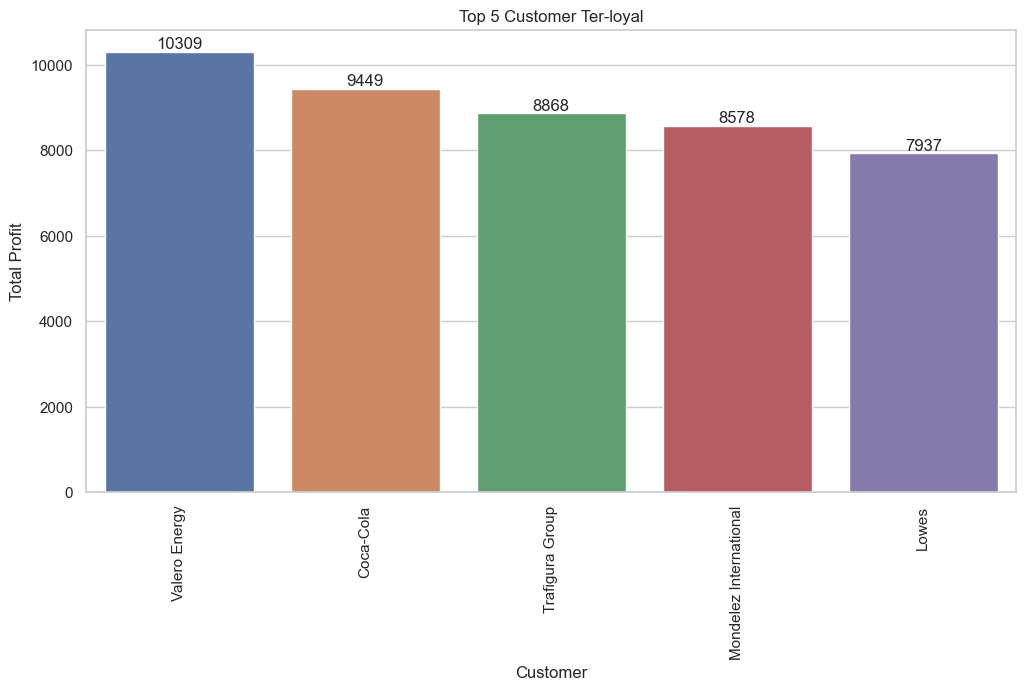

In [54]:
#Membuat Variabel untuk melihat top 5 customer ter-loyal
customerProfit = data[['Customer', 'Profit']].groupby(['Customer']).sum().sort_values(by = 'Profit',ascending = False).head(5).reset_index()

#Membuat kanvas grafik
plt.figure(figsize=(12,6))

#Visualisasi data Top 5 Customer ter-loyal
ax = sns.barplot(data=customerProfit, x='Customer', y ='Profit')

#Menampilkan label di setiap bar
ax.bar_label(ax.containers[0], fmt= '%0.0f', label_type='edge')

#Menambahkan judul grafik
plt.title('Top 5 Customer Ter-loyal')

#Menambahkan y label
plt.ylabel('Total Profit')

#Merotasi label axis x
plt.xticks(rotation=90)

#menampilkan grafik
plt.show()

Daftar customer diatas adalah top 5 customer yang paling memberikan profit bagi AWS. Langkah-langkah seperti memberikan pelayanan extra, menjaga hubungan pelanggan yang baik, dan memahami kebutuhan khusus dari pelanggan-pelanggan ini dapat membantu AWS mempertahankan dan bahkan meningkatkan margin keuntungan. Strategi ini akan membantu perusahaan dalam mempertahankan pelanggan loyal yang berkontribusi besar terhadap kesuksesan bisnis mereka.

#### *b. Pengaruh Diskon Terhadap Antusiasme Customer*

Antusiasme Customer dapat dilihat dengan membandingkan rata-rata diskon dengan product yang sudah terjual.

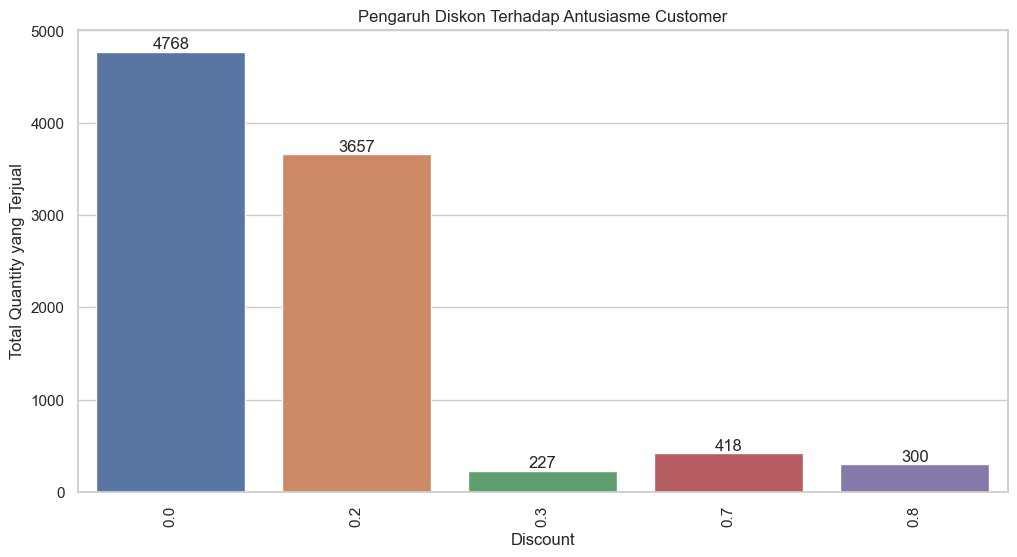

In [63]:
#Membuat Variabel untuk melihat top 5 customer ter-loyal
discountQuantity = data[['Discount', 'Quantity']].groupby(['Discount']).count().sort_values(by = 'Quantity',ascending = False).head(5).reset_index()

#Membuat kanvas grafik
plt.figure(figsize=(12,6))

#Visualisasi data Top 5 Customer ter-loyal
ax = sns.barplot(data=discountQuantity, x='Discount', y ='Quantity')

#Menampilkan label di setiap bar
ax.bar_label(ax.containers[0], fmt= '%0.0f', label_type='edge')

#Menambahkan judul grafik
plt.title('Pengaruh Diskon Terhadap Antusiasme Customer')

#Menambahkan y label
plt.ylabel('Total Quantity yang Terjual')

#Merotasi label axis x
plt.xticks(rotation=90)

#menampilkan grafik
plt.show()

Bila dilihat dari grafik ternyata pemberian diskon tidak terlalu berpengaruh terhadap antusiasme Customer ketika membeli product. Hal ini terlihat dari total quanity yang terjual pada produk dengan diskon 0.3, 0.7, bahkan 0.8 tidak meningkatkan penjualan secara signifikan.

### **5. Pengaruh Lokasi Geografis Terhadap Penjualan AWS**

Hal ini dapat kita analisis dengan melihat wilayah dalam cakupan negara dengan penjualan terbesar dan terkecil.

#### *a. Negara dengan Sales Tertinggi dan Terendah*

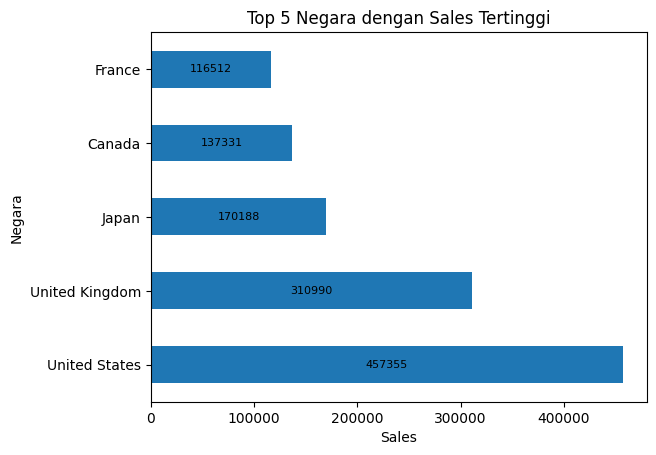

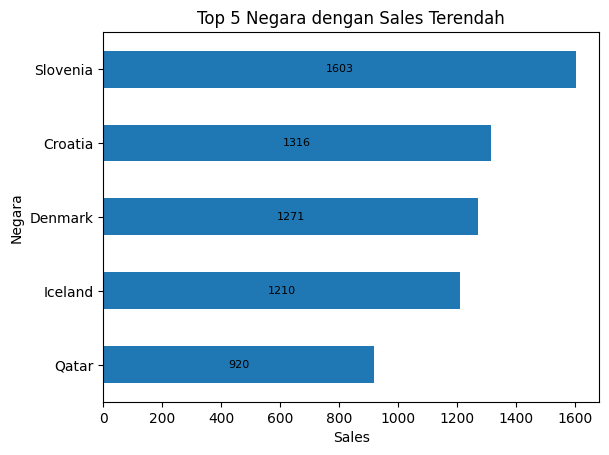

In [23]:
# Mengelompokkan data Sales berdasarkan Country
highestSalesCountry = data.groupby('Country')['Sales'].sum().nlargest(5)
lowestSalesCountry = data.groupby('Country')['Sales'].sum().nsmallest(5)

# Visualisasi data Top 5 Highest Sales by Country dengan sumbu x dan y yang ditukar
highestSalesCountry.plot(kind='barh', xlabel='Sales', ylabel='Negara', title='Top 5 Negara dengan Sales Tertinggi')
plt.yticks(rotation=0)
plt.bar_label(plt.gca().containers[0], fmt='%0.0f', label_type='center', fontsize=8)
plt.show() # Menampilkan grafik

# Visualisasi data Top 5 Lowest Sales by Country dengan sumbu x dan y yang ditukar
lowestSalesCountry.plot(kind='barh', xlabel='Sales', ylabel='Negara', title='Top 5 Negara dengan Sales Terendah')
plt.yticks(rotation=0)
plt.bar_label(plt.gca().containers[0], fmt='%0.0f', label_type='center', fontsize=8)
plt.show() # Menampilkan grafik


**Analisis Top 5 negara dengan Sales tertinggi:**

United States mendominasi dengan penjualan tertinggi di urutan pertama, diikuti oleh United Kingdom di urutan kedua. Dengan mengetahui negara-negara ini memiliki penjualan yang signifikan, kita jadi mengetahui pasar yang lebih potensial dan dapat mengalokasikan sumber daya pemasaran dengan lebih efektif untuk memaksimalkan pertumbuhan dan peningkatan penjualan.

**Analisis Top 5 negara dengan Sales terendah:**

Qatar menempati urutan pertama dengan penjualan terendah, diikuti oleh Iceland, Denmark, Croatia, dan Slovenia. Perbandingan antara jumlah penjualan negara dengan penjualan tertinggi dan terendah sangat signifikan. Pada Top 5 Negara dengan Sales Tertinggi, penjualan mencapai puluhan bahkan ratusan ribu dolar, sementara pada Top 5 Negara dengan Sales Terendah, penjualan hanya mencapai ribuan dolar saja. Melalui analisis ini, dapat disimpulkan bahwa negara-negara dengan penjualan rendah memerlukan perhatian ekstra agar penjualan dapat terus meningkat dan produk atau layanan lebih dikenal oleh penduduk di negara-negara tersebut.

Setelah mengidentifikasi dua negara dengan penjualan tertinggi dan terendah, langkah selanjutnya adalah menganalisis produk-produk yang paling diminati dan yang kurang diminati. Hal ini akan membantu dalam merancang strategi penjualan yang lebih efektif guna meningkatkan penjualan layanan AWS.

#### *b. Product Paling Diminati di 2 Negara dengan Sales Tertinggi*

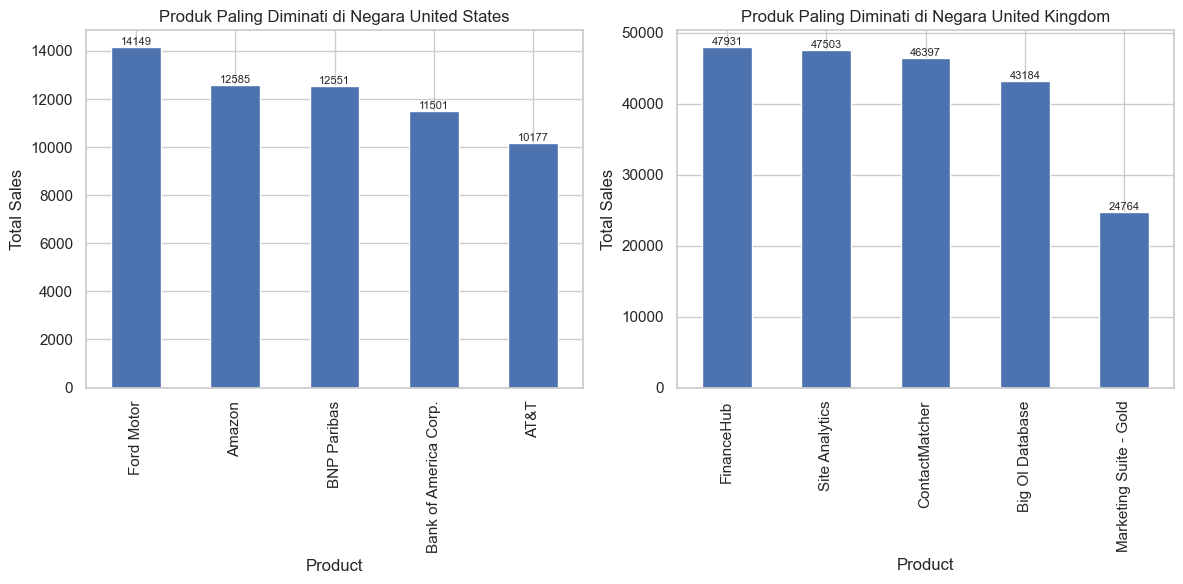

In [68]:
# Memisahkan data untuk United States dan United Kingdom
us_data = data[data['Country'] == 'United States']
uk_data = data[data['Country'] == 'United Kingdom']

# Mengelompokkan data Sales berdasarkan Product dan menghitung total Sales per Product di United States
product_sales_us = us_data.groupby('Customer')['Sales'].sum().nlargest()

# Mengelompokkan data Sales berdasarkan Product dan menghitung total Sales per Product di United Kingdom
product_sales_uk = uk_data.groupby('Product')['Sales'].sum().nlargest()

# Visualisasi data Top Products by Sales di United States
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
product_sales_us.plot(kind='bar', xlabel='Product', ylabel='Total Sales', title='Produk Paling Diminati di Negara United States')
plt.xticks(rotation=90)
plt.bar_label(plt.gca().containers[0], fmt='%0.0f', label_type='edge', fontsize=8)

# Visualisasi data Top Products by Sales di United Kingdom
plt.subplot(1, 2, 2)
product_sales_uk.plot(kind='bar', xlabel='Product', ylabel='Total Sales', title='Produk Paling Diminati di Negara United Kingdom')
plt.xticks(rotation=90)
plt.bar_label(plt.gca().containers[0], fmt='%0.0f', label_type='edge', fontsize=8)

plt.tight_layout()
plt.show() # Menampilkan grafik


Produk yang paling diminati di negara United States adalah Ford Motor, Amazon, BNP Paribas, Bank America Corp., dan AT&T. 

Produk yang paling diminati di negara United Kingdom adalah FinanceHub, Site Analytics, ContactMatcher, Big Oil Database, dan Marketing Suite - Gold.

Informasi ini dapat digunakan sebagai dasar untuk mengarahkan upaya pemasaran ekstra dan strategi penjualan ke produk-produk ini dengan tujuan meningkatkan penjualan AWS di kedua negara tersebut. Dengan pemahaman yang lebih baik tentang preferensi pelanggan di setiap negara, AWS dapat merancang kampanye pemasaran yang lebih efektif dan relevan.

#### *b. Product Paling Kurang Diminati di 2 Negara dengan Sales Tertinggi*

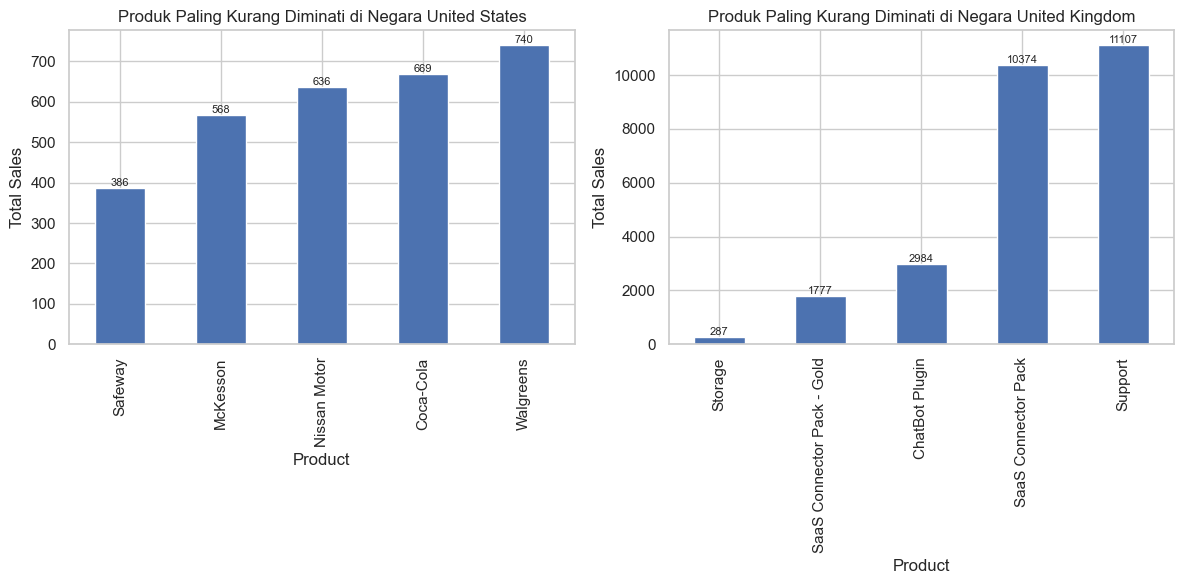

In [75]:
# Memisahkan data untuk United States dan United Kingdom
us_data = data[data['Country'] == 'United States']
uk_data = data[data['Country'] == 'United Kingdom']

# Mengelompokkan data Sales berdasarkan Product dan menghitung total Sales per Product di United States
product_sales_us = us_data.groupby('Customer')['Sales'].sum().nsmallest()

# Mengelompokkan data Sales berdasarkan Product dan menghitung total Sales per Product di United Kingdom
product_sales_uk = uk_data.groupby('Product')['Sales'].sum().nsmallest()

# Visualisasi data Top Products by Sales di United States
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
product_sales_us.plot(kind='bar', xlabel='Product', ylabel='Total Sales', title='Produk Paling Kurang Diminati di Negara United States')
plt.xticks(rotation=90)
plt.bar_label(plt.gca().containers[0], fmt='%0.0f', label_type='edge', fontsize=8)

# Visualisasi data Top Products by Sales di United Kingdom
plt.subplot(1, 2, 2)
product_sales_uk.plot(kind='bar', xlabel='Product', ylabel='Total Sales', title='Produk Paling Kurang Diminati di Negara United Kingdom')
plt.xticks(rotation=90)
plt.bar_label(plt.gca().containers[0], fmt='%0.0f', label_type='edge', fontsize=8)

plt.tight_layout()
plt.show() # Menampilkan grafik


Produk yang paling kurang diminati di negara United States adalah safeway, McKesson, Nissan Motor, Coca-Cola, dan Walgreens.

Produk yang paling kurang diminati di negara United Kingdom adalah Storage, SaaS Connector Pack - Gold, ChalBot Plugin, SaaS Connector Pack, dan Support.

Informasi ini juga dapat digunakan sebagai dasar untuk mengevaluasi pemasaran produk tersebut yang sudah ada untuk meningkatkan antusiasme customer terhadap produk-produk tersebut. 

### *c. Product Paling Diminati di 2 Negara dengan Sales Terendah*

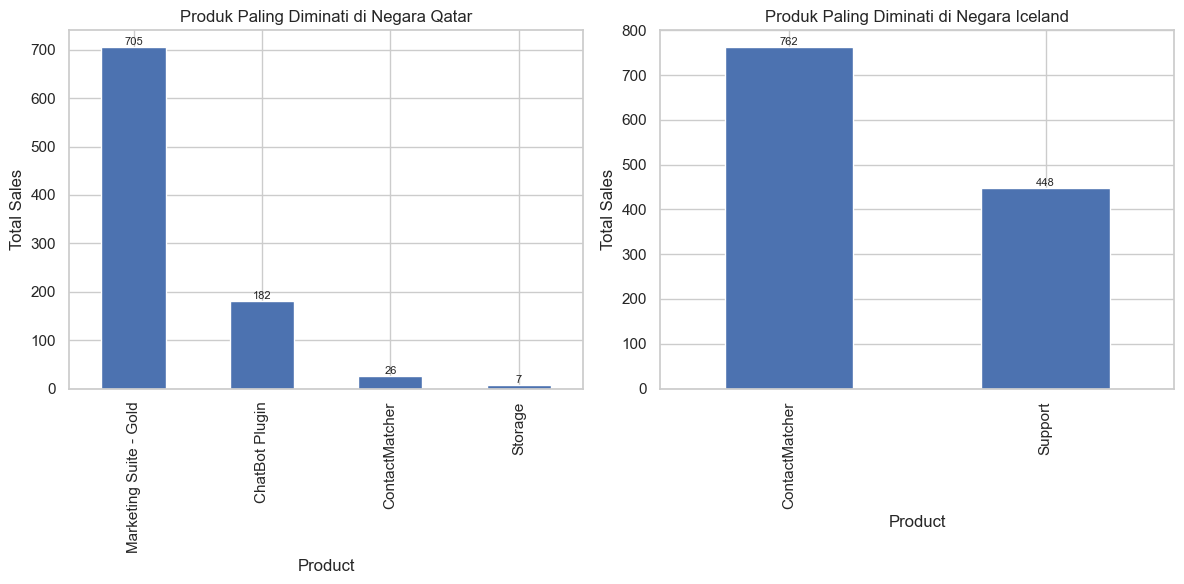

In [74]:
# Memisahkan data untuk United States dan United Kingdom
Qatar_data = data[data['Country'] == 'Qatar']
Iceland_data = data[data['Country'] == 'Iceland']

# Mengelompokkan data Sales berdasarkan Product dan menghitung total Sales per Product di United States
product_sales_Qatar = Qatar_data.groupby('Product')['Sales'].sum().nlargest()

# Mengelompokkan data Sales berdasarkan Product dan menghitung total Sales per Product di United Kingdom
product_sales_Iceland = Iceland_data.groupby('Product')['Sales'].sum().nlargest()

# Visualisasi data Top  by Sales di United States
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
product_sales_Qatar.plot(kind='bar', xlabel='Product', ylabel='Total Sales', title='Produk Paling Diminati di Negara Qatar')
plt.xticks(rotation=90)
plt.bar_label(plt.gca().containers[0], fmt='%0.0f', label_type='edge', fontsize=8)

# Visualisasi data Top Products by Sales di United Kingdom
plt.subplot(1, 2, 2)
product_sales_Iceland.plot(kind='bar', xlabel='Product', ylabel='Total Sales', title='Produk Paling Diminati di Negara Iceland')
plt.xticks(rotation=90)
plt.bar_label(plt.gca().containers[0], fmt='%0.0f', label_type='edge', fontsize=8)

plt.tight_layout()
plt.show() # Menampilkan grafik


Pada produk-produk diatas perlu peningkatan pemasaran agar total sales dapat terus bertambah.

### *d. Product Paling Kurang Diminati di 2 Negara dengan Sales Terendah*

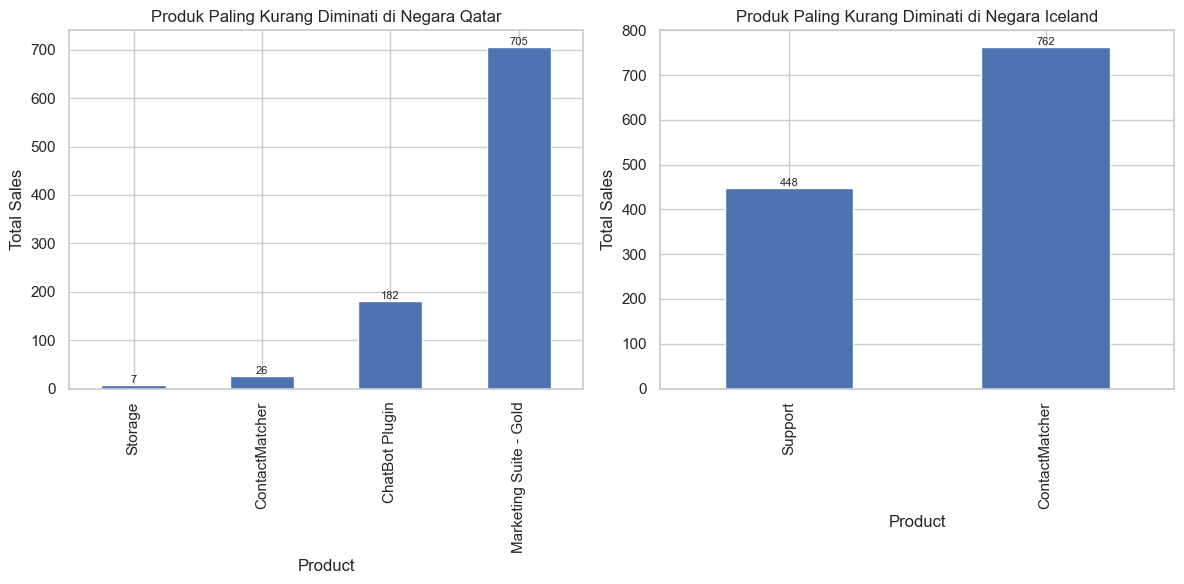

In [73]:
# Memisahkan data untuk United States dan United Kingdom
Qatar_data = data[data['Country'] == 'Qatar']
Iceland_data = data[data['Country'] == 'Iceland']

# Mengelompokkan data Sales berdasarkan Product dan menghitung total Sales per Product di United States
product_sales_Qatar = Qatar_data.groupby('Product')['Sales'].sum().nsmallest()

# Mengelompokkan data Sales berdasarkan Product dan menghitung total Sales per Product di United Kingdom
product_sales_Iceland = Iceland_data.groupby('Product')['Sales'].sum().nsmallest()

# Visualisasi data Top  by Sales di United States
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
product_sales_Qatar.plot(kind='bar', xlabel='Product', ylabel='Total Sales', title='Produk Paling Kurang Diminati di Negara Qatar')
plt.xticks(rotation=90)
plt.bar_label(plt.gca().containers[0], fmt='%0.0f', label_type='edge', fontsize=8)

# Visualisasi data Top Products by Sales di United Kingdom
plt.subplot(1, 2, 2)
product_sales_Iceland.plot(kind='bar', xlabel='Product', ylabel='Total Sales', title='Produk Paling Kurang Diminati di Negara Iceland')
plt.xticks(rotation=90)
plt.bar_label(plt.gca().containers[0], fmt='%0.0f', label_type='edge', fontsize=8)

plt.tight_layout()
plt.show() # Menampilkan grafik


Dari analisis diatas, perlu dilakukan peninjauan lebih lanjut terhadap produk-produk yang kurang diminati di negara dengan sales yang rendah, baik dengan re-branding atau peniadaan produk tersebut guna mencegah kerugian di masa depan.  

## **KESIMPULAN & REKOMENDASI**
---


### **A. Kesimpulan**

**Kesimpulan Berdasarkan Tujuan dan Masalah yang Telah Ditetapkan:**

1. **Kinerja Penjualan AWS**: Berdasarkan analisis data, dapat disimpulkan bahwa kinerja penjualan AWS secara keseluruhan menunjukkan tren peningkatan dari tahun ke tahun. Meskipun terdapat penurunan bulanan pada bulan Oktober, secara keseluruhan, jumlah order dan penjualan produk AWS terus meningkat. Ini mencerminkan tingginya antusiasme pelanggan terhadap produk AWS.

2. **Keuntungan Produk AWS**: Dari data yang ada, terlihat bahwa keuntungan yang dihasilkan dari produk AWS juga mengalami peningkatan dari tahun ke tahun. Ini menunjukkan bahwa meskipun terdapat fluktuasi dalam penjualan, terutama pada beberapa periode waktu tertentu, hal tersebut tidak berdampak negatif pada profitabilitas produk AWS.

3. **Produk AWS yang Paling Menguntungkan**: Dari analisis produk AWS, dapat disimpulkan bahwa produk "Alchemy" adalah yang paling menguntungkan di setiap segmen, meskipun tidak termasuk dalam top 3 produk berdasarkan total penjualan (sales). Faktor-faktor yang memengaruhi tingkat keuntungan produk termasuk margin keuntungan yang tinggi dan efisiensi operasional.

4. **Manajemen Hubungan Pelanggan**: Data pelanggan dapat digunakan untuk memahami interaksi dengan pelanggan dan memastikan layanan pelanggan yang baik. Ini memungkinkan manajemen untuk mempertahankan hubungan yang kuat dengan pelanggan setia dan memberikan penawaran khusus kepada mereka.

5. **Pengaruh Lokasi Geografis**: Analisis data menunjukkan bahwa lokasi geografis memengaruhi pola penjualan AWS. Beberapa negara memiliki potensi pasar yang lebih tinggi, seperti Amerika Serikat dan Inggris. Hal ini dapat digunakan untuk mengalokasikan sumber daya pemasaran dengan lebih efektif.

6. **Strategi untuk Meningkatkan Keuntungan**: Rekomendasi telah disampaikan untuk meningkatkan keuntungan penjualan produk AWS, termasuk fokus pada segmen "SMB," perluasan segmen "Strategic," dan pemaksimalan produk "Alchemy." Selain itu, evaluasi pemberian diskon juga dianjurkan untuk memahami dampaknya terhadap profitabilitas.

Dengan memahami kinerja penjualan, profitabilitas, tren, hubungan pelanggan, pengaruh lokasi geografis, dan strategi untuk meningkatkan keuntungan, AWS dapat mengambil langkah-langkah strategis untuk meningkatkan operasi bisnis mereka dan mencapai kesuksesan yang lebih besar di pasar.

### **A. Rekomendasi**

Berdasarkan analisis data yang telah dilakukan, berikut adalah beberapa rekomendasi untuk meningkatkan kinerja penjualan dan profitabilitas AWS:

1. **Maksimalkan Segmen "SMB"**: Karena segmen "SMB" mendominasi penjualan di hampir semua industri, AWS dapat meningkatkan fokus pemasaran dan layanan untuk segmen ini. Peningkatan kerjasama dengan bisnis kecil dan menengah dapat membantu meningkatkan penjualan secara signifikan.

2. **Perluasan Segmen "Strategic"**: AWS dapat mempertimbangkan strategi pemasaran yang lebih geografis atau industri-spesifik untuk meningkatkan minat segmen "Strategic," terutama dalam industri seperti Healthcare, Transportation, dan Miscellaneous.

3. **Peningkatan Penawaran "Enterprise" di Industri Miscellaneous**: Untuk industri Miscellaneous, peningkatan penawaran produk dan strategi pemasaran khusus untuk segmen "Enterprise" dapat menjadi langkah yang efektif untuk meningkatkan penjualan dan keuntungan.

4. **Manfaatkan Potensi di Industri Finance**: Karena industri Finance memiliki total penjualan tertinggi di berbagai segmen, AWS dapat meningkatkan upaya pemasaran dan layanan khusus untuk mempertahankan keunggulan ini. Menawarkan solusi khusus yang sesuai dengan kebutuhan industri ini dapat menjadi strategi yang efektif.

5. **Evaluasi Penggunaan Diskon**: AWS perlu melakukan evaluasi mendalam terkait dengan penggunaan diskon. Meskipun diskon dapat mendorong penjualan, perlu dipahami dampaknya terhadap profitabilitas. AWS dapat mempertimbangkan strategi diskon yang lebih bijaksana untuk memaksimalkan keuntungan.

6. **Peningkatan Manajemen Hubungan Pelanggan**: AWS dapat lebih memanfaatkan data pelanggan untuk memahami kebutuhan dan preferensi pelanggan. Strategi personalisasi dan pemberian penawaran khusus kepada pelanggan setia dapat membantu mempertahankan pelanggan dan meningkatkan kepuasan pelanggan.

7. **Ekspansi ke Pasar Potensial**: Berdasarkan analisis geografis, AWS dapat mempertimbangkan untuk memperluas operasi ke pasar yang memiliki potensi lebih tinggi, seperti Amerika Serikat dan Inggris. Strategi pemasaran yang lebih intensif dapat digunakan untuk menjangkau lebih banyak pelanggan potensial di pasar ini.

8. **Manfaatkan Data Tren Penjualan**: Dengan pemahaman tentang tren penjualan, AWS dapat merencanakan persediaan dan sumber daya dengan lebih baik. Ini membantu menghindari kekurangan stok selama periode peningkatan penjualan, seperti bulan Maret, September, dan November.

9. **Evaluasi Produk Kurang Laku**: Produk dengan penjualan rendah atau bahkan merugi seperti "Marketing Suite" perlu dievaluasi secara mendalam. Manajemen harus memutuskan apakah produk ini perlu dipertahankan atau ditingkatkan, atau bahkan dihentikan jika tidak memberikan kontribusi positif.

10. **Fokus pada Produk Unggulan**: Produk "Alchemy" adalah yang paling menguntungkan. AWS dapat meningkatkan upaya pemasaran dan pengembangan produk ini untuk memaksimalkan keuntungan.

11. **Peningkatan Efisiensi Operasional**: Untuk mencapai margin keuntungan yang lebih baik, AWS perlu terus meningkatkan efisiensi operasional. Evaluasi biaya dan proses bisnis dapat membantu mengidentifikasi area di mana efisiensi dapat ditingkatkan.

Dengan mengimplementasikan rekomendasi ini, AWS dapat memperbaiki kinerja penjualan, meningkatkan profitabilitas, dan memperkuat hubungan dengan pelanggan. Hal ini akan membantu AWS untuk tetap menjadi pemimpin di industri layanan cloud computing.

## **LINK TABLEAU**
---

Link visualisasi data analisis sales & profit AWS SaaS dapat dilihat pada link dibawah ini:
https://public.tableau.com/views/CapstoneProject2_NadyaSarillaAgatha/DataAnalysisAWSSaaS?:language=en-US&:display_count=n&:origin=viz_share_link